In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina' 

In [2]:
import os
import sys


home = os.environ['HOME']
project_dir = '{}/projects/cikm2017/'.format(home)
hdf5_dir = os.path.join(project_dir, 'hdf5')

sys.path.append(project_dir)
os.chdir(project_dir) 

In [3]:
import cikm
import pandas as pd

/Users/khalil/anaconda2/envs/cikm2017/lib/python3.6/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


Loaded 405,051 explanations
Found 356,799 user-item interactions
#users: 10,000
#items: 2,066
Loaded 1,302,560 explanations
Found 1,105,374 user-item interactions
#users: 5,711
#items: 17,856
Loaded 227,750 explanations
Found 225,379 user-item interactions
#users: 10,000
#items: 8,048


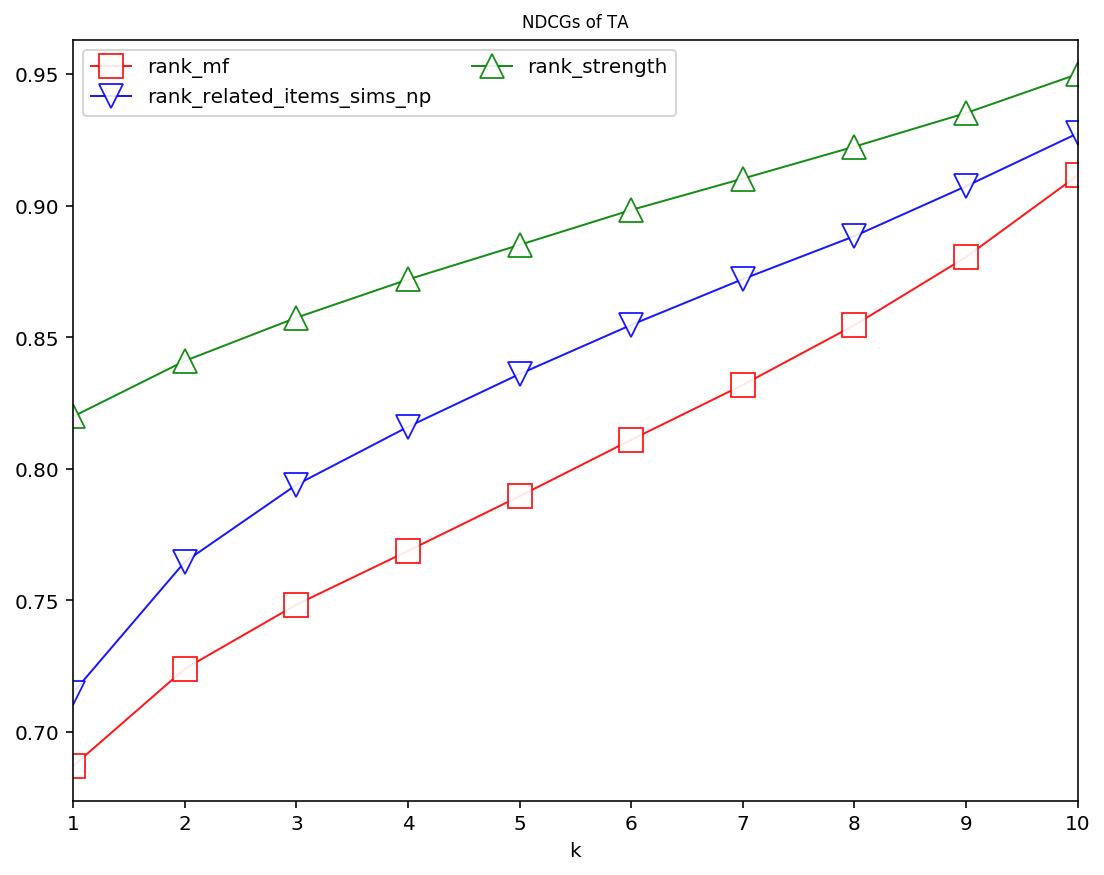

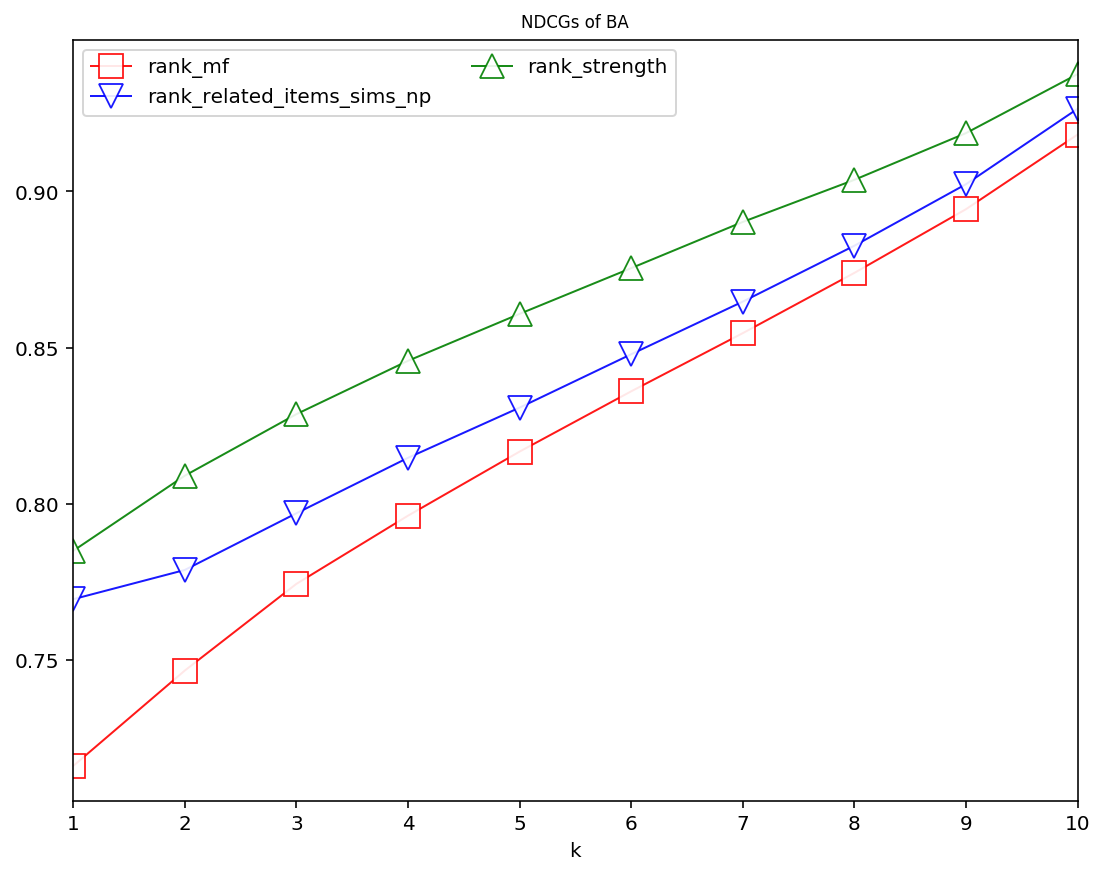

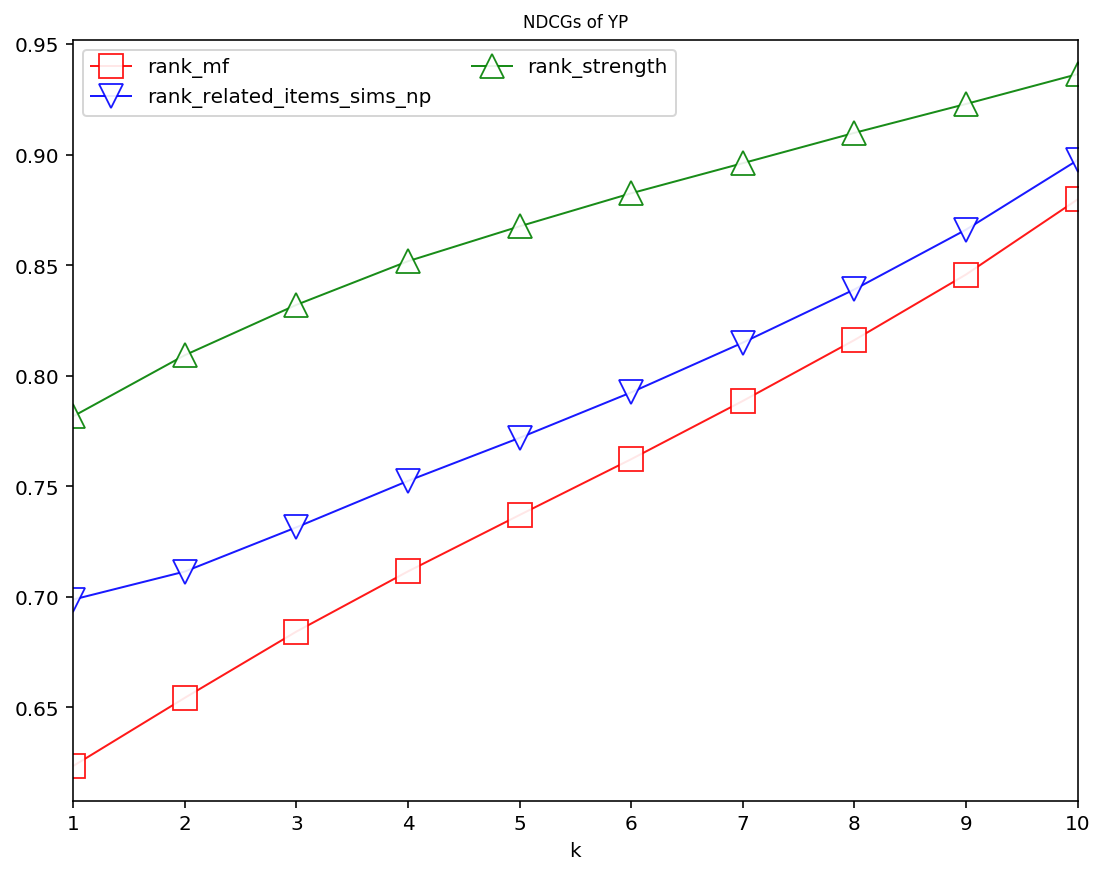

In [77]:
hdf5_dir = '/Users/khalil/projects/explanations/hdf5'
for dataset in ('ta', 'ba', 'yp'):
    path = os.path.join(hdf5_dir, '{}-bw-nw-a00-sessions.h5'.format(dataset))
    df_explanations = pd.read_hdf(path)
    print('Loaded {:,} explanations'.format(len(df_explanations)))

    df_explanations = cikm.fit(df_explanations)

    df_ndcgs = cikm.compute_ndcg(df_explanations)
    df_ndcgs_summary = cikm.summarize_ndcg(df_ndcgs)

    cikm.plot_ndcg(df_ndcgs_summary, title='NDCGs of {}'.format(dataset.upper()))

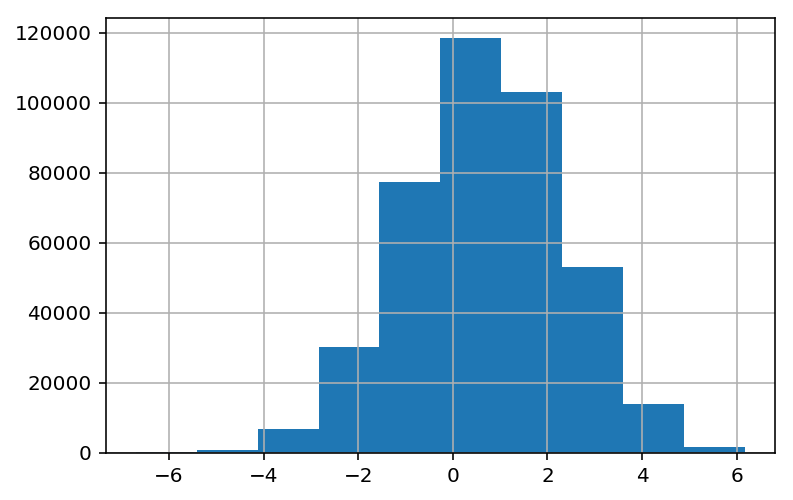

In [6]:
df_explanations.rank_mf.hist()

## Create `ratings.txt` file for all datasets

In [67]:
for dataset in ('ta', 'ba', 'yp'):
    if dataset != 'ta':
        continue
        
    path = os.path.join(hdf5_dir, 'ta-bw-nw-a00-sessions.h5')
    df_explanations = pd.read_hdf(path)
    print('Loaded {:,} explanations'.format(len(df_explanations)))

    
# path = os.path.join(os.path.realpath('./data'), 'ratings.txt')
path = os.path.join('./data', 'ratings.txt')
df_ratings = df_explanations[cols].drop_duplicates().rename(columns={'target_item_average_rating': 'rating', 
                                                                     'target_item_id': 'item_id'})
display(df_ratings.head(2))

user_ids = df_ratings.user_id.unique().tolist()
item_ids = df_ratings.item_id.unique().tolist()

print('#users: {:,}\n#items: {:,}'.format(len(user_ids), len(item_ids)))

df_ratings['item_id'] = df_ratings.item_id.map(lambda x: item_ids.index(x))
df_ratings['user_id'] = df_ratings.user_id.map(lambda x: user_ids.index(x))

display(df_ratings.head())
df_ratings.to_csv(path, sep='\t', header=False, index=False)

,user_id,item_id,rating
0,530AFB80986A6D31D469E302247F074C,Regal_Kowloon_Hotel,3.5
1,530AFB80986A6D31D469E302247F074C,Crowne_Plaza_Hotel_Hong_Kong_Causeway_Bay,4.5


In [71]:
!open .

In [78]:
len(item_ids)

2066